# Preliminaries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)
I2 = np.eye(2, dtype = complex)

# Parameters
m = 2
Nk = 99
kys =np.linspace(-np.pi, np.pi, Nk)

# Energy dispersion

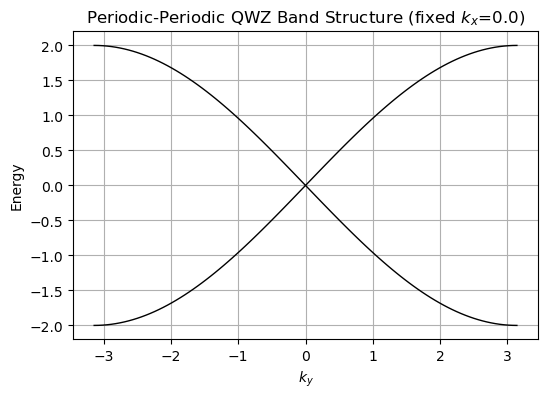

In [3]:
kx = 0.0  # fixed kx for 2D visualization
bands = []

for ky in kys:
    Hk = np.sin(kx)*sigma_x + np.sin(ky)*sigma_y + (m - np.cos(kx) - np.cos(ky))*sigma_z
    eigvals = np.linalg.eigvalsh(Hk)
    bands.append(eigvals)

bands = np.array(bands).T

# Plot
plt.figure(figsize=(6,4))
for band in bands:
    plt.plot(kys, band, color='black', linewidth=1)
plt.xlabel('$k_y$')
plt.ylabel('Energy')
plt.title(f'Periodic-Periodic QWZ Band Structure (fixed $k_x$={kx})')
plt.grid(True)
plt.show()

# 3D Band structure

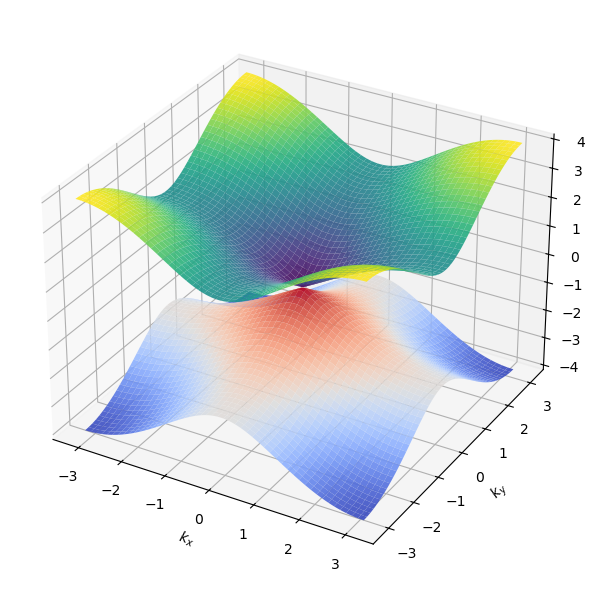

In [4]:
kxs = np.linspace(-np.pi, np.pi, Nk)
KX, KY = np.meshgrid(kxs, kys)

band1 = np.zeros((Nk, Nk))
band2 = np.zeros((Nk, Nk))

# Energy bands
for i in range(Nk):
    for j in range(Nk):
        kx, ky = kxs[i], kys[j]
        Hk = np.sin(kx) * sigma_x + np.sin(ky) * sigma_y + (m - np.cos(kx) - np.cos(ky)) * sigma_z
        eigvals = np.linalg.eigvalsh(Hk)
        band1[j, i] = eigvals[0]
        band2[j, i] = eigvals[1]

# Plot
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(KX, KY, band1, cmap='coolwarm', edgecolor='none', alpha=0.9, label='Lower Band')
ax.plot_surface(KX, KY, band2, cmap='viridis', edgecolor='none', alpha=0.9, label='Upper Band')

ax.set_xlabel('$k_x$')
ax.set_ylabel('$k_y$')
ax.set_zlabel('Energy')
plt.tight_layout()
plt.show()
